In [7]:
import pandas as pd
import geopandas as gpd
print('Pandas version: ', pd.__version__)
print('Geopandas version: ', gpd.__version__)

Pandas version:  1.4.3
Geopandas version:  0.11.0


In [8]:
df = pd.read_csv(f'./LBD.csv')
print(type(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156744 entries, 0 to 156743
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   156744 non-null  int64 
 1   CODEBASE     156744 non-null  object
 2   DAY_NIGHT_x  156744 non-null  object
 3   CNT_x        156744 non-null  int64 
 4   DAY_NIGHT_y  156744 non-null  object
 5   CNT_y        156744 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 7.2+ MB


In [9]:
gf = gpd.read_file(f'./secondary_release_area/G97_63000_U0202_2015.shp')
print(type(gf))
gf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CODE2      907 non-null    object  
 1   TOWN_ID    907 non-null    object  
 2   TOWN       907 non-null    object  
 3   COUNTY_ID  907 non-null    object  
 4   COUNTY     907 non-null    object  
 5   U_ID       907 non-null    int64   
 6   AREA       907 non-null    float64 
 7   X          907 non-null    float64 
 8   Y          907 non-null    float64 
 9   geometry   907 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 71.0+ KB


In [10]:
gf['CODE2'] = gf['CODE2'].str.slice_replace(5, 6, '-00')
gf['CODE2'] = gf['CODE2'].str.replace('-00A', '-010')

In [11]:
gf1 = gf.merge(df,left_on='CODE2', right_on='CODEBASE')
gf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CODE2        907 non-null    object  
 1   TOWN_ID      907 non-null    object  
 2   TOWN         907 non-null    object  
 3   COUNTY_ID    907 non-null    object  
 4   COUNTY       907 non-null    object  
 5   U_ID         907 non-null    int64   
 6   AREA         907 non-null    float64 
 7   X            907 non-null    float64 
 8   Y            907 non-null    float64 
 9   geometry     907 non-null    geometry
 10  Unnamed: 0   907 non-null    int64   
 11  CODEBASE     907 non-null    object  
 12  DAY_NIGHT_x  907 non-null    object  
 13  CNT_x        907 non-null    int64   
 14  DAY_NIGHT_y  907 non-null    object  
 15  CNT_y        907 non-null    int64   
dtypes: float64(3), geometry(1), int64(4), object(8)
memory usage: 120.5+ KB


In [21]:
gf711 = gpd.read_file(f'shapefiles/7-11_2points.shp')
print(type(gf711))
gf711.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        2 non-null      object  
 1   descriptio  2 non-null      object  
 2   timestamp   0 non-null      object  
 3   begin       0 non-null      object  
 4   end         0 non-null      object  
 5   altitudeMo  0 non-null      object  
 6   tessellate  2 non-null      int64   
 7   extrude     2 non-null      int64   
 8   visibility  2 non-null      int64   
 9   drawOrder   0 non-null      object  
 10  icon        0 non-null      object  
 11  geometry    2 non-null      geometry
dtypes: geometry(1), int64(3), object(8)
memory usage: 320.0+ bytes


In [22]:
print(gf711.crs)
print(gf1.crs)

epsg:3826
epsg:3826


In [23]:
gf711_buf = gf711
gf711_buf['geometry'] = gf711.buffer(500)
gf711_buf.head()

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,geometry
0,7-ELEVEN便利商店-鑫台北門市,(02)23312768台北市中正區黎明里忠孝西路一段35號一樓,None,None,None,None,-1,0,-1,None,None,"POLYGON ((302815.937 2770995.873, 302813.529 2..."
1,7-ELEVEN便利商店-千成門市,(02)23577481台北市中正區林森南路4號之3,None,None,None,None,-1,0,-1,None,None,"POLYGON ((303263.594 2770725.440, 303261.186 2..."


In [33]:
intersection = gpd.overlay(gf1,gf711_buf,  how='intersection', keep_geom_type=True)

<AxesSubplot:>

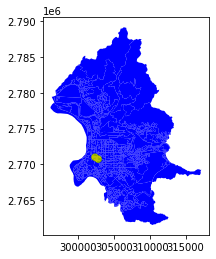

In [34]:
base=gf1.plot(color='b')
gf711_buf.plot(ax=base, color='g')
intersection.plot(ax=base, color='y')

In [35]:
intersection['geometry'].area

0      35936.503344
1      24769.268317
2     314325.244933
3      20402.672100
4     203476.996341
5      91531.846941
6      30503.313858
7      63191.277376
8      10973.758243
9      32863.831322
10    126908.391144
11     79717.017058
12     24073.842092
13    431121.244612
14     26740.261175
15      9986.421204
16     41752.388113
dtype: float64

In [37]:
intersection.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CODE2        17 non-null     object  
 1   TOWN_ID      17 non-null     object  
 2   TOWN         17 non-null     object  
 3   COUNTY_ID    17 non-null     object  
 4   COUNTY       17 non-null     object  
 5   U_ID         17 non-null     int64   
 6   AREA         17 non-null     float64 
 7   X            17 non-null     float64 
 8   Y            17 non-null     float64 
 9   Unnamed: 0   17 non-null     int64   
 10  CODEBASE     17 non-null     object  
 11  DAY_NIGHT_x  17 non-null     object  
 12  CNT_x        17 non-null     int64   
 13  DAY_NIGHT_y  17 non-null     object  
 14  CNT_y        17 non-null     int64   
 15  Name         17 non-null     object  
 16  descriptio   17 non-null     object  
 17  timestamp    0 non-null      object  
 18  begin        0 non-null 

In [38]:
intersection['Name']

0     7-ELEVEN便利商店-鑫台北門市
1     7-ELEVEN便利商店-鑫台北門市
2     7-ELEVEN便利商店-鑫台北門市
3     7-ELEVEN便利商店-鑫台北門市
4     7-ELEVEN便利商店-鑫台北門市
5     7-ELEVEN便利商店-鑫台北門市
6     7-ELEVEN便利商店-鑫台北門市
7     7-ELEVEN便利商店-鑫台北門市
8      7-ELEVEN便利商店-千成門市
9      7-ELEVEN便利商店-千成門市
10     7-ELEVEN便利商店-千成門市
11     7-ELEVEN便利商店-千成門市
12     7-ELEVEN便利商店-千成門市
13     7-ELEVEN便利商店-千成門市
14     7-ELEVEN便利商店-千成門市
15     7-ELEVEN便利商店-千成門市
16     7-ELEVEN便利商店-千成門市
Name: Name, dtype: object